# The simple linear regression model


# Importing Relevant Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [39]:
df=pd.read_csv('energydata_complete.csv')
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


# Rename Columns

Get List of Columns

In [40]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

Assign New Titles to Columns

In [41]:
column_names = {'date':'date' , 'Appliances':'Appliances', 'lights':'lights', 'T1':'Temp_kitchen', 'RH_1':'Humd_kitchen', 
                'T2':'Temp_living_room', 'RH_2':'Humd_living_room', 'T3': 'Temp_laundry_room','RH_3': 'Humd_laundry_room',
                'T4': 'Temp_office_room', 'RH_4': 'Humd_ofice', 'T5': 'Temp_bathroom', 'RH_5':'Humd_bathroom', 
                'T6':'Temp_oute_building','RH_6':'Humd_out_building', 'T7': 'Temp_ironing_room', 'RH_7': 'Humd_ironing_room', 
                'T8': 'Temp_teen_room2','RH_8':'Humd_in_teen_room2', 'T9':'Temp_parents_room', 'RH_9': 'Humd_parents_room',
                'T_out':'Temp_out', 'Press_mm_hg': 'Press_mm_hg', 'RH_out': 'Humd_out', 'Windspeed':'Windspeed',
                'Visibility': 'Visibility', 'Tdewpoint':'Tdewpoint', 'rv1': 'Random_var1', 'rv2':'Random_var2'}

Merge New Columns with Dataset

In [42]:
df = df.rename(columns=column_names)
df

,date,Appliances,lights,Temp_kitchen,Humd_kitchen,Temp_living_room,Humd_living_room,Temp_laundry_room,Humd_laundry_room,Temp_office_room,...,Temp_parents_room,Humd_parents_room,Temp_out,Press_mm_hg,Humd_out,Windspeed,Visibility,Tdewpoint,Random_var1,Random_var2
0,11/01/2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


# Confirm Number of NUll Data

In [43]:
df.isnull().sum()

date                  0
Appliances            0
lights                0
Temp_kitchen          0
Humd_kitchen          0
Temp_living_room      0
Humd_living_room      0
Temp_laundry_room     0
Humd_laundry_room     0
Temp_office_room      0
Humd_ofice            0
Temp_bathroom         0
Humd_bathroom         0
Temp_oute_building    0
Humd_out_building     0
Temp_ironing_room     0
Humd_ironing_room     0
Temp_teen_room2       0
Humd_in_teen_room2    0
Temp_parents_room     0
Humd_parents_room     0
Temp_out              0
Press_mm_hg           0
Humd_out              0
Windspeed             0
Visibility            0
Tdewpoint             0
Random_var1           0
Random_var2           0
dtype: int64

# Select Random Data Set

In [44]:
simple_linear_reg_df = df[['Temp_living_room', 'Temp_out']].sample(15, random_state=2)
simple_linear_reg_df

,Temp_living_room,Temp_out
1117,17.426667,-2.27
16275,22.760000,14.20
13272,21.230000,10.50
3160,21.100000,7.50
19210,21.856667,10.70
8260,17.356667,4.47
12299,19.000000,6.50
13505,22.700000,13.30
12913,19.593333,5.95
17788,21.890000,8.73


# Regression Plot

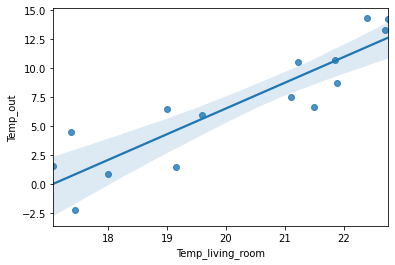

In [45]:
sns.regplot(x='Temp_living_room', y= 'Temp_out', data=simple_linear_reg_df)

# Normalising the Dataset To A Common Scale Using The Min Max Scaler

Drop Date and Light(not influenced by other temp and press) which seems irrelevant

In [46]:
df = df.drop(columns=['date','lights'])
df

,Appliances,Temp_kitchen,Humd_kitchen,Temp_living_room,Humd_living_room,Temp_laundry_room,Humd_laundry_room,Temp_office_room,Humd_ofice,Temp_bathroom,...,Temp_parents_room,Humd_parents_room,Temp_out,Press_mm_hg,Humd_out,Windspeed,Visibility,Tdewpoint,Random_var1,Random_var2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [47]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Appliances'])
energy_target = normalised_df['Appliances']

# Split Dataset Into The Training And Testing dataset.

In [48]:
x_train, x_test, y_train, y_test = train_test_split(features_df, energy_target, test_size=0.3, random_state=42)

# Perform Linear Model

Declare Model Type

In [49]:
linear_model = LinearRegression()

Fit the model to the training dataset

In [50]:
linear_model.fit(x_train, y_train)


LinearRegression()

In [51]:
predicted_values = linear_model.predict(x_test)

# Measuring Performance

Mean_absolute_error

In [52]:
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.05

R-Squared

In [53]:
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.149

REsidual Sum of Square

In [54]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

45.348

Root Mean Squared Error

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.088

# Penalisation Methods

Ridge Regression

In [56]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

Calculating New RMSE with ridge

In [57]:
pred = ridge_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred))
round(rmse, 3)

0.088

Feature Selection and Lasso Regression - Least Absolute Shrinkage and Selection Operator

In [58]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

Calculating New RMSE with lasso

In [59]:
pred_lasso = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_lasso))
round(rmse, 3)

0.094

comparing the effects of regularisation

In [60]:
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Humd_living_room,-0.456662,-0.411048,-0.000000
1,Temp_out,-0.321969,-0.262343,0.000000
2,Temp_living_room,-0.236198,-0.201417,0.000000
3,Temp_parents_room,-0.189977,-0.188948,-0.000000
4,Humd_in_teen_room2,-0.157585,-0.156818,-0.000110
5,Humd_out,-0.077748,-0.054822,-0.049557
6,Humd_ironing_room,-0.044620,-0.045983,-0.000000
7,Humd_parents_room,-0.039808,-0.041373,-0.000000
8,Temp_bathroom,-0.015645,-0.019840,-0.000000
9,Temp_kitchen,-0.003242,-0.018372,0.000000
